<a href="https://colab.research.google.com/github/fsilvino/INE5644-data-mining-projeto-final/blob/master/eda/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Análise exploratória de dados e preparação de dados por Flávio Silvino
import pandas as pd
import numpy as np
import math

In [2]:
# Inicialmente o carregamento havia sido feito mais simples:
# Depois fui incrementando com as descobertas feitas durante a exploração
df = pd.read_csv('../datasets/openDataSUS/INFLUD-21-09-2020.csv', delimiter=';')

d:\github\ine5644-data-mining-projeto-final\venv\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (15,60,62,63,64,92,94,108,117,121,123) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# número de linhas e colunas
df.shape

(754901, 154)

In [4]:
for i, name in enumerate(df.columns.values):
    if i in (15,60,62,63,64,92,94,108,117,121,123):
        print(str(i) + ' - ' + name + ': ')
        print('dtype: ', df[name].dtype)
        print('Valores: ', end='')
        print(df[name].unique())
        print()

15 - COD_IDADE: 
dtype:  object
Valores: [2008 3021 3080 3020 3004 3059 3067 3068 3054 3005 3024 3029 3019 3053
 3048 3056 3077 3051 3039 3014 3040 3072 3002 3028 3001 2009 3057 3032
 3027 3064 3025 3073 3043 2006 2002 2011 3036 3075 3060 3013 3003 3009
 3079 3017 2001 3052 3094 3050 3034 3031 3006 3038 3045 3083 1027 3049
 3030 3026 3085 3023 3062 3037 3087 3093 3033 3063 3042 3046 3082 3090
 3035 3061 1013 3055 3058 3078 3070 3066 3069 3086 3065 3074 3016 3076
 2003 3018 3041 1002 3071 3044 3081 3084 3047 3015 3091 3088 3008 3089
 1000 3095 1001 3096 3092 3100 3010 3097 3022 3007 2007 3011 3012 3098
 2004 3099 3107 1009 2010 1016 1021 3105 2005 2000 3102 1004 1011 1010
 1007 1028 1005 3103 3101 3104 1003 1015 1012 3138 1006 1026 1014 1025
 1008 3106 1017 3000 1019 1020 3108 3120 3109 3136 1023 1022 1018 1024
 3132 3111 3139 '3062' '3073' '3055' '3021' '3051' '3049' '3036' '3029'
 '3045' '3079' '3063' '3081' '3091' '3075' '3061' '3076' '3074' '3092'
 '3071' '3070' '3053' '3059' '3040'

In [5]:
pd.Series(df['PAC_COCBO'].unique().astype(str)).sort_values(key=lambda x: x.str.lower(), ascending=False).head(5).to_markdown(tablefmt='html')

,0
8,XXX
0,nan
353,992225
842,992210
659,992205


In [6]:
# Verificando quais são as colunas de data para converter para datetime
df.filter(regex='^DT_', axis=1).head(5)

,DT_NOTIFIC,DT_SIN_PRI,DT_NASC,DT_UT_DOSE,DT_VAC_MAE,DT_DOSEUNI,DT_1_DOSE,DT_2_DOSE,DT_ANTIVIR,DT_INTERNA,...,DT_PCR,DT_EVOLUCA,DT_ENCERRA,DT_DIGITA,DT_VGM,DT_RT_VGM,DT_TOMO,DT_RES_AN,DT_CO_SOR,DT_RES
0,08/01/2020,05/01/2020,13/05/2019,NaN,NaN,NaN,NaN,NaN,05/01/2020,05/01/2020,...,13/02/2020,25/01/2020,19/05/2020,09/01/2020,NaN,NaN,NaN,NaN,NaN,NaN
1,28/01/2020,22/01/2020,05/03/1998,NaN,NaN,NaN,NaN,NaN,24/01/2020,24/01/2020,...,04/02/2020,02/02/2020,18/02/2020,28/01/2020,NaN,NaN,NaN,NaN,NaN,NaN
2,13/01/2020,11/01/2020,31/07/1939,NaN,NaN,NaN,NaN,NaN,11/01/2020,11/01/2020,...,24/01/2020,20/01/2020,24/01/2020,24/01/2020,NaN,NaN,NaN,NaN,NaN,NaN
3,18/02/2020,12/02/2020,25/10/1999,NaN,NaN,NaN,NaN,NaN,19/02/2020,12/02/2020,...,NaN,NaN,NaN,21/02/2020,NaN,NaN,NaN,NaN,NaN,NaN
4,19/02/2020,14/02/2020,17/01/2016,NaN,NaN,NaN,NaN,NaN,19/02/2020,18/02/2020,...,04/03/2020,23/02/2020,12/03/2020,21/02/2020,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Indentifiquei que:
#    - As colunas que começam com DT_ são do tipo data e estão no formato dd/mm/aaaa
#    - As colunas 'FLUASU_OUT', 'FLUBLI_OUT', 'CLASSI_OUT', 'LO_PS_VGM', 'OUT_ANIM' são do tipo string
#    - A coluna 'PAC_COCBO' possui um valor inválido 'XXX', então estou convertendo para int e os valores inválidos estão setados para NA
#    - A coluna 'COD_IDADE' possui um valor inválido '20-1', então também estou convertendo para int e os valores inválidos setados para NA
#    - Várias colunas utilizam o código 9 para Ignorado, ou seja, não se sabe o valor pois não foi informado (serão tratados como NA)
to_date_parser = lambda x: pd.to_datetime(x, format='%d/%m/%Y', errors='coerce')
to_numeric_parser = lambda x: pd.to_numeric(x, errors='coerce')

# lendo o dataset
df = pd.read_csv('../datasets/openDataSUS/INFLUD-21-09-2020.csv', delimiter=';',
                 date_parser=to_date_parser,
                 parse_dates=['DT_NOTIFIC', 'DT_SIN_PRI', 'DT_NASC', 'DT_UT_DOSE', 'DT_VAC_MAE',
                              'DT_DOSEUNI', 'DT_1_DOSE', 'DT_2_DOSE', 'DT_ANTIVIR', 'DT_INTERNA',
                              'DT_ENTUTI', 'DT_SAIDUTI', 'DT_RAIOX', 'DT_COLETA', 'DT_PCR',
                              'DT_EVOLUCA', 'DT_ENCERRA', 'DT_DIGITA', 'DT_VGM', 'DT_RT_VGM',
                              'DT_TOMO', 'DT_RES_AN', 'DT_CO_SOR', 'DT_RES'],
                 na_values={'CS_SEXO': '9', 'CS_GESTANT': '9', 'CS_RACA': '9', 'CS_ESCOL_N': '9', 'CS_ZONA': '9', 'HISTO_VGM': '9', 'SURTO_SG': '9', 'NOSOCOMIAL': '9', 'AVE_SUINO': '9',
                            'FEBRE': '9', 'TOSSE': '9', 'GARGANTA': '9', 'DISPNEIA': '9', 'DESC_RESP': '9', 'SATURACAO': '9', 'DIARREIA': '9', 'VOMITO': '9', 'DOR_ABD': '9', 'FADIGA': '9',
                            'PERD_OLFT': '9', 'PERD_PALA': '9', 'OUTRO_SIN': '9', 'FATOR_RISC': '9', 'PUERPERA': '9', 'CARDIOPATI': '9', 'HEMATOLOGI': '9', 'SIND_DOWN': '9', 'HEPATICA': '9',
                            'ASMA': '9', 'DIABETES': '9', 'NEUROLOGIC': '9', 'PNEUMOPATI': '9', 'IMUNODEPRE': '9', 'RENAL': '9', 'OBESIDADE': '9', 'OUT_MORBI': '9', 'VACINA': '9',
                            'MAE_VAC': '9', 'M_AMAMENTA': '9', 'ANTIVIRAL': '9', 'HOSPITAL': '9', 'UTI': '9', 'SUPORT_VEN': '9', 'RAIOX_RES': '9', 'TOMO_RES': '9', 'AMOSTRA': '9',
                            'TP_AMOSTRA': '9', 'RES_AN': '9', 'POS_AN_FLU': '9', 'POS_AN_OUT': '9', 'PCR_RESUL': '9', 'POS_PCRFLU': '9', 'POS_PCROUT': '9', 'TP_AM_SOR': '9', 'EVOLUCAO': '9'},
                 converters={'PAC_COCBO': to_numeric_parser, 'COD_IDADE': to_numeric_parser},
                 dtype={'FLUASU_OUT': str, 'FLUBLI_OUT': str, 'CLASSI_OUT': str, 'LO_PS_VGM': str, 'OUT_ANIM': str})

In [8]:
# Calculando percentual de valores faltantes para cada coluna
def calcularFaltantes(dataFrame):
    registros = dataFrame.shape[0]
    return dataFrame.apply(lambda x: sum(x.isnull()) / registros, axis=0)

def listarFaltantes(faltantes, percentual):
    display(faltantes.loc[faltantes > percentual].sort_values(ascending=False).to_markdown(tablefmt="html"))
    
def calcularEListarFaltantes(dataFrame, percentual):
    faltantes = calcularFaltantes(dataFrame)
    listarFaltantes(faltantes, percentual)

In [9]:
# Mostrando o percentual de valores faltantes das colunas com mais de 90% de seus registros em branco
calcularEListarFaltantes(df, 0.9)

,0
AN_PARA2,0.999999
FLUBLI_OUT,0.999997
AN_PARA3,0.999995
FLUASU_OUT,0.999993
AN_PARA1,0.99998
PCR_PARA2,0.999974
PCR_PARA4,0.99997
AN_ADENO,0.999963
PCR_BOCA,0.999958
PCR_PARA1,0.999899


In [10]:
# verificando quantos resultados de teste de COVID-19 estão preenchidos (depois verificou-se que existem mais colunas com este dado)
df['RES_IGM'].count()

51742

In [11]:
df.head()

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,...,DS_AN_OUT,TP_AM_SOR,SOR_OUT,DT_CO_SOR,TP_SOR,OUT_SOR,DT_RES,RES_IGG,RES_IGM,RES_IGA
0,2020-01-08,2,2020-01-05,2,SP,GVE XVII CAMPINAS,1342.0,CAMPINAS,350950,HOSPITAL E MATERNIDADE CELSO PIERRO,...,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN
1,2020-01-28,5,2020-01-22,4,PR,02RS METROPOLITANA,1356.0,CURITIBA,410690,COMPLEXO HOSPITAL DE CLINICAS,...,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN
2,2020-01-13,3,2020-01-11,2,PR,16RS APUCARANA,1370.0,JANDAIA DO SUL,411210,CASA DE SAUDE E MAT N SENHORA FATIMA,...,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN
3,2020-02-18,8,2020-02-12,7,MA,REGI0NAL DE SAUDE METROPOLITANA,1430.0,SAO LUIS,211130,SOCORRAO II,...,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN
4,2020-02-19,8,2020-02-14,7,PR,15RS MARINGA,1369.0,MARINGA,411520,HOSPITAL MUNICIPAL DE MARINGA THELMA VILLANOVA...,...,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN


In [12]:
# Verificando o período dos dados
print("min:", df['DT_NOTIFIC'].min())
print("max:", df['DT_NOTIFIC'].max())

min: 2019-12-29 00:00:00
max: 2020-09-21 00:00:00


In [13]:
# Existe um valor estranho (que parece incorreto: 20-1) que impede a conversão para inteiro na coluna COD_IDADE. Poderíamos remover ou tratar este valor,
# porém como não sabemos para que serve este campo e não encontramos ele no dicionário de dados, estamos descartando-o.
# Além disso, outras colunas que, no nosso entendimento, não serão importantes para o objetivo e escopo deste projeto estão sendo descartadas.
# Assim como colunas que possuem mais de 90% de seus registros com valor em branco (faltante) também foram removidas.
df = df.drop(['COD_IDADE', 'SEM_NOT', 'OBES_IMC', 'DT_UT_DOSE', 'MAE_VAC', 'DT_VAC_MAE',
       'M_AMAMENTA', 'DT_DOSEUNI', 'DT_1_DOSE', 'DT_2_DOSE', 'DT_ANTIVIR',
       'DT_RAIOX', 'DT_COLETA', 'DT_PCR', 'POS_PCRFLU', 'TP_FLU_PCR',
       'PCR_FLUASU', 'FLUASU_OUT', 'PCR_FLUBLI', 'FLUBLI_OUT',
       'POS_PCROUT', 'PCR_VSR', 'PCR_PARA1', 'PCR_PARA2', 'PCR_PARA3',
       'PCR_PARA4', 'PCR_ADENO', 'PCR_METAP', 'PCR_BOCA', 'PCR_RINO',
       'PCR_OUTRO', 'DS_PCR_OUT', 'DT_TOMO', 'TP_TES_AN', 'DT_RES_AN',
       'POS_AN_FLU', 'TP_FLU_AN', 'POS_AN_OUT', 'AN_VSR',
       'AN_PARA1', 'AN_PARA2', 'AN_PARA3', 'AN_ADENO', 'AN_OUTRO',
       'DS_AN_OUT', 'OUT_ANIM', 'LO_PS_VGM', 'DT_VGM', 'DT_RT_VGM',
       'PAIS_VGM', 'CO_PS_VGM', 'CS_ETINIA', 'OUT_SOR', 'SOR_OUT',
       'OUT_ANTIV', 'TOMO_OUT', 'PAC_COCBO', 'PAC_DSCBO', 'DT_CO_SOR',
       'DT_RES', 'TP_AM_SOR', 'TP_SOR', 'DT_SIN_PRI', 'CS_ESCOL_N', 'CO_PAIS', 'ID_PAIS'], axis=1)

In [14]:
# df = df.drop(['ID_PAIS'], axis=1)

In [15]:
df[df.columns[16:]].head()

,ID_RG_RESI,CO_RG_RESI,ID_MN_RESI,CO_MUN_RES,CS_ZONA,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,...,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,TOMO_RES,RES_AN,AN_SARS2,RES_IGG,RES_IGM,RES_IGA
0,GVE XVII CAMPINAS,1342.0,VINHEDO,355670.0,1.0,2.0,2.0,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
1,02RS METROPOLITANA,1356.0,CURITIBA,410690.0,1.0,2.0,2.0,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
2,16RS APUCARANA,1370.0,JANDAIA DO SUL,411210.0,1.0,1.0,2.0,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
3,REGI0NAL DE SAUDE METROPOLITANA,1430.0,SAO LUIS,211130.0,1.0,2.0,2.0,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
4,15RS MARINGA,1369.0,MARINGA,411520.0,1.0,2.0,2.0,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN


In [16]:
df.shape

(754901, 88)

In [17]:
# Filtrando para utilizar apenas dados de pacientes notificados e internados em SC
df = df.loc[(df['SG_UF_NOT'] == 'SC') & (df['SG_UF_NOT'] == df['SG_UF_INTE']) & (df['CLASSI_FIN'] == 5)]

In [18]:
# verificando se há dados duplicados
df.duplicated().any()

False

In [19]:
# Verificando se, ao definir FATOR_RISC = 'N', os demais campos relacionados a fatores de risco estarão como Ignorado (verifiquei que sim)
df[['FATOR_RISC', 'CARDIOPATI', 'PUERPERA', 'HEMATOLOGI', 'SIND_DOWN', 'HEPATICA', 'ASMA', 'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL', 'OBESIDADE', 'OUT_MORBI', 'MORB_DESC']]

,FATOR_RISC,CARDIOPATI,PUERPERA,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OUT_MORBI,MORB_DESC
100,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,HAS
215,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
451,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
631,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1347,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754609,S,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,CA PULMAO PALIATIVO
754726,S,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN
754745,S,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,DISLEPIDEMIA E DEPRESSAO
754792,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Verificando quantos valores distintos existem para MORB_DESC (verifiquei que são muitos e não daria pra converter para colunas, pois aumentaria muito o número de features)
outrasMorb = pd.Series(df['MORB_DESC'].unique())
print("Qtd: ", outrasMorb.shape[0])
outrasMorb.head(10).to_markdown(tablefmt='html')

Qtd:  984


,0
0,HAS
1,nan
2,HIPOTIREOIDISMO
3,TABAGISTA
4,HEPATITE C
5,OBESIDADE
6,HIPERTENSAO
7,DPOC
8,DEPRESSAO
9,CA DE PROSTATA/LABIRINTITE


In [21]:
# Preencher como 2-Não nos fatores de risco em branco quando FATOR_RISC = 2-Não
def preencherComBaseEmOutraColuna(linha, colunaBase, valorBase, colunasPreencher, valorPreencher):
    if (linha[colunaBase] == valorBase):
        for colunaPreencher in colunasPreencher:
            if (math.isnan(linha[colunaPreencher])):
                linha[colunaPreencher] = valorPreencher
    return linha

df = df.apply(lambda linha: preencherComBaseEmOutraColuna(linha, 'FATOR_RISC', 'N', ['CARDIOPATI', 'PUERPERA', 'HEMATOLOGI', 'SIND_DOWN', 'HEPATICA', 'ASMA', 'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL', 'OBESIDADE', 'OUT_MORBI'], 2), axis=1)

In [22]:
# Verificando valores dos fatores de risco faltantes
friscos = df[['FATOR_RISC', 'CARDIOPATI', 'PUERPERA', 'HEMATOLOGI', 'SIND_DOWN', 'HEPATICA', 'ASMA', 'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL', 'OBESIDADE', 'OUT_MORBI']]
friscos[friscos.isna().any(axis=1)]

,FATOR_RISC,CARDIOPATI,PUERPERA,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OUT_MORBI
100,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
451,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1827,S,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1971,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2513,S,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752404,S,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN
753135,S,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
753285,S,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
754052,S,1.0,NaN,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0


In [23]:
# como são muitos registros (proporcionalmente ao total de registros disponíveis 3 mil de 17 mil) que estão com NaN, irei considerar que não possui aquele fator de risco que está como Ignorado
df = df.apply(lambda linha: preencherComBaseEmOutraColuna(linha, 'FATOR_RISC', 'S', ['CARDIOPATI', 'PUERPERA', 'HEMATOLOGI', 'SIND_DOWN', 'HEPATICA', 'ASMA', 'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL', 'OBESIDADE', 'OUT_MORBI'], 2), axis=1)
df[['CARDIOPATI', 'PUERPERA', 'HEMATOLOGI', 'SIND_DOWN', 'HEPATICA', 'ASMA', 'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL', 'OBESIDADE', 'OUT_MORBI']]

,CARDIOPATI,PUERPERA,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OUT_MORBI
100,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
215,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
451,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0
631,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1347,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
754609,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0
754726,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
754745,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
754792,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [24]:
# confirmando que foi corrigido
friscosCorrigidos = df[['FATOR_RISC', 'CARDIOPATI', 'PUERPERA', 'HEMATOLOGI', 'SIND_DOWN', 'HEPATICA', 'ASMA', 'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL', 'OBESIDADE', 'OUT_MORBI']]
friscosCorrigidos[friscosCorrigidos.isna().any(axis=1)]

,FATOR_RISC,CARDIOPATI,PUERPERA,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OUT_MORBI


In [25]:
# verificando percentuais de valores faltantes dos sinais e sintomas
calcularEListarFaltantes(df[['FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'DIARREIA', 'VOMITO', 'DOR_ABD', 'FADIGA', 'PERD_OLFT', 'PERD_PALA']], 0)

,0
DOR_ABD,0.536232
PERD_PALA,0.534953
PERD_OLFT,0.533248
FADIGA,0.523657
GARGANTA,0.145673
VOMITO,0.145354
DIARREIA,0.138107
SATURACAO,0.0849318
DESC_RESP,0.0835465
FEBRE,0.0702259


In [26]:
# Verificando valores dos sinais e sintomas faltantes
sintomas = df[['FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'DIARREIA', 'VOMITO', 'DOR_ABD', 'FADIGA', 'PERD_OLFT', 'PERD_PALA']]
sintomas[sintomas.isna().any(axis=1)]

,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA
100,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN
215,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
451,1.0,1.0,2.0,1.0,1.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN
631,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN
1347,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
753726,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN
754130,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
754228,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN
754507,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN


In [27]:
# como são muitos registros com algum sinal/sintoma faltante, considerei que não possui o sintoma
df.fillna(value={'FEBRE': 2, 'TOSSE': 2, 'GARGANTA': 2, 'DISPNEIA': 2, 'DESC_RESP': 2, 'SATURACAO': 2, 'DIARREIA': 2, 'VOMITO': 2, 'DOR_ABD': 2, 'FADIGA': 2, 'PERD_OLFT': 2, 'PERD_PALA': 2}, inplace=True)

In [28]:
# confirmando o preenchimento
df[['FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'DIARREIA', 'VOMITO', 'DOR_ABD', 'FADIGA', 'PERD_OLFT', 'PERD_PALA']]

,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA
100,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
215,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
451,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
631,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
1347,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
754609,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
754726,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
754745,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0
754792,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0


In [29]:
df.head()

,DT_NOTIFIC,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,CO_UNI_NOT,CS_SEXO,...,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,TOMO_RES,RES_AN,AN_SARS2,RES_IGG,RES_IGM,RES_IGA
100,2020-03-30,13,SC,ITAJAI,1550.0,BALNEARIO CAMBORIU,420200,HOSPITAL UNIMED LITORAL,3718395,F,...,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
215,2020-03-16,12,SC,BRACO DO NORTE,5608.0,BRACO DO NORTE,420280,HOSPITAL SANTA TERESINHA,2665883,F,...,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
451,2020-04-27,17,SC,BRACO DO NORTE,5608.0,SAO MARTINHO,421710,FUNDACAO MEDICO SOCIAL RURAL DE SAO MARTINHO,2550881,M,...,2.0,2.0,2.0,2.0,NaN,5.0,NaN,NaN,NaN,NaN
631,2020-05-05,18,SC,JARAGUA DO SUL,1567.0,JARAGUA DO SUL,420890,HOSPITAL SAO JOSE,2306336,F,...,2.0,2.0,2.0,2.0,NaN,4.0,NaN,NaN,NaN,NaN
1347,2020-05-28,20,SC,JOINVILLE,1565.0,JOINVILLE,420910,HOSPITAL REGIONAL HANS DIETER SCHMIDT,2436450,M,...,2.0,2.0,2.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN


In [30]:
# Removi as colunas que não seriam utilizadas ou que possuíam muitos valores faltantes que não valeria a pena excluir os registros do dataset
df = df.drop(['SEM_PRI', 'CO_REGIONA', 'ID_UNIDADE', 'CO_UNI_NOT', 'CO_RG_RESI', 'SURTO_SG', 'NOSOCOMIAL', 'OUTRO_DES', 'MORB_DESC', 'TP_ANTIVIR', 'DT_INTERNA', 'CO_RG_INTE',
             'DT_ENTUTI', 'DT_SAIDUTI', 'RAIOX_OUT', 'AMOSTRA', 'TP_AMOSTRA', 'OUT_AMOST', 'CLASSI_OUT', 'CRITERIO', 'DT_EVOLUCA', 'DT_ENCERRA', 'DT_DIGITA', 'CS_GESTANT', 'DT_NOTIFIC', 'DT_NASC'], axis=1)

In [31]:
# usei este comando para incrementalmente ir removendo as colunas
# df = df.drop(['DT_NASC'], axis=1)

In [32]:
# Utilizei este comando para verificar coluna por coluna os valores nulos e decidir se excluiria a coluna ou preencheria (e com qual valor)
df.loc[df['SUPORT_VEN'].isnull()]

,SG_UF_NOT,ID_REGIONA,ID_MUNICIP,CO_MUN_NOT,CS_SEXO,NU_IDADE_N,TP_IDADE,CS_RACA,SG_UF,ID_RG_RESI,...,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,TOMO_RES,RES_AN,AN_SARS2,RES_IGG,RES_IGM,RES_IGA
100,SC,ITAJAI,BALNEARIO CAMBORIU,420200,F,87,3,1.0,SC,ITAJAI,...,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1827,SC,FLORIANOPOLIS,FLORIANOPOLIS,420540,M,47,3,1.0,SC,FLORIANOPOLIS,...,2.0,2.0,2.0,2.0,NaN,5.0,NaN,NaN,NaN,NaN
1971,SC,ITAJAI,BALNEARIO CAMBORIU,420200,M,60,3,1.0,SC,ITAJAI,...,2.0,2.0,2.0,2.0,NaN,4.0,NaN,NaN,NaN,NaN
3126,SC,ITAJAI,ITAJAI,420820,M,31,3,1.0,SC,ITAJAI,...,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3825,SC,JARAGUA DO SUL,JARAGUA DO SUL,420890,M,55,3,1.0,SC,JARAGUA DO SUL,...,2.0,2.0,2.0,2.0,1.0,5.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752361,SC,JARAGUA DO SUL,JARAGUA DO SUL,420890,M,60,3,1.0,SC,JOINVILLE,...,2.0,2.0,2.0,2.0,NaN,5.0,NaN,NaN,NaN,NaN
752867,SC,XANXERE,PONTE SERRADA,421340,M,37,3,1.0,SC,XANXERE,...,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
752925,SC,ITAJAI,ITAJAI,420820,M,64,3,1.0,SC,ITAJAI,...,2.0,2.0,2.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN
754130,SC,ARARANGUA,PRAIA GRANDE,421380,F,29,3,1.0,SC,ARARANGUA,...,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN


In [33]:
df['SUPORT_VEN'].mode()

0    2.0
dtype: float64

In [34]:
# Considerei a moda 1-Zona Urbana
df.fillna({'CS_ZONA':1}, inplace=True)

# Utilizei a moda 2-Não
df.fillna({'AVE_SUINO': 2}, inplace=True)

# Utilizei a moda 2-Não
df.fillna({'OUTRO_SIN': 2}, inplace=True)

# Utilizei a moda 2-Não
df.fillna({'VACINA': 2}, inplace=True)

# Utilizei a moda 2-Não
df.fillna({'ANTIVIRAL': 2}, inplace=True)

# Utilizei a moda 1-Sim
df.fillna({'HOSPITAL': 1}, inplace=True)

# Utilizei a moda 2-Não
df.fillna({'UTI': 2}, inplace=True)

# Utilizei a moda 2-Sim, não invasivo
df.fillna({'SUPORT_VEN': 2}, inplace=True)

# Utilizei a moda 6-Não realizado
df.fillna({'RAIOX_RES': 6}, inplace=True)

# Defini 2-Não, pois geralmente não possui outros dados relacionados também
df.fillna({'AMOSTRA': 2}, inplace=True)

# Utilizei a moda 1-Cura
df.fillna({'EVOLUCAO': 1}, inplace=True)

# Utilizei a moda 2-Não
df.fillna({'HISTO_VGM': 2}, inplace=True)

# Setei para 2-Não pois vazio significa não marcado
df.fillna({'PCR_SARS2': 2}, inplace=True)

# Defini como 6-Não realizado
df.fillna({'TOMO_RES': 6}, inplace=True)

# Setei para 2-Não pois vazio significa não marcado
df.fillna({'AN_SARS2': 2}, inplace=True)

# Usei a moda 1-Branca
df.fillna({'CS_RACA': 1}, inplace=True)

In [35]:
# Usei este comando para ver aos poucos as colunas e tratar os faltantes com os comandos acima
df[df.columns[57:]].head()

,RES_AN,AN_SARS2,RES_IGG,RES_IGM,RES_IGA
100,NaN,2.0,NaN,NaN,NaN
215,NaN,2.0,NaN,NaN,NaN
451,5.0,2.0,NaN,NaN,NaN
631,4.0,2.0,NaN,NaN,NaN
1347,1.0,2.0,NaN,NaN,NaN


In [36]:
df.shape

(9384, 62)

In [37]:
semIgg = df.drop(['RES_IGG', 'RES_IGM', 'RES_IGA'], axis=1)
semIgg[semIgg.isna().any(axis=1)]

,SG_UF_NOT,ID_REGIONA,ID_MUNICIP,CO_MUN_NOT,CS_SEXO,NU_IDADE_N,TP_IDADE,CS_RACA,SG_UF,ID_RG_RESI,...,EVOLUCAO,HISTO_VGM,PCR_SARS2,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,TOMO_RES,RES_AN,AN_SARS2
100,SC,ITAJAI,BALNEARIO CAMBORIU,420200,F,87,3,1.0,SC,ITAJAI,...,1.0,2.0,1.0,2.0,2.0,2.0,2.0,6.0,NaN,2.0
215,SC,BRACO DO NORTE,BRACO DO NORTE,420280,F,37,3,1.0,SC,BRACO DO NORTE,...,1.0,2.0,1.0,2.0,2.0,2.0,2.0,6.0,NaN,2.0
1369,SC,FLORIANOPOLIS,SAO JOSE,421660,M,44,3,1.0,SC,FLORIANOPOLIS,...,1.0,2.0,1.0,2.0,2.0,2.0,2.0,6.0,4.0,2.0
2321,SC,VIDEIRA,FRAIBURGO,420550,F,22,3,1.0,SC,VIDEIRA,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0,4.0,2.0
2374,SC,MAFRA,SAO BENTO DO SUL,421580,M,48,3,1.0,SC,MAFRA,...,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753285,SC,FLORIANOPOLIS,SAO JOSE,421660,M,45,3,1.0,SC,FLORIANOPOLIS,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0,5.0,2.0
753938,SC,FLORIANOPOLIS,SAO JOAO BATISTA,421630,F,52,3,4.0,SC,FLORIANOPOLIS,...,2.0,2.0,1.0,2.0,2.0,1.0,1.0,6.0,NaN,2.0
754073,SC,JOACABA,CAMPOS NOVOS,420360,M,25,3,1.0,SC,JOACABA,...,1.0,2.0,2.0,2.0,1.0,2.0,2.0,6.0,NaN,2.0
754228,SC,TUBARAO,TUBARAO,421870,M,89,3,1.0,SC,TUBARAO,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0,NaN,2.0


In [38]:
calcularEListarFaltantes(df, 0)

,0
RES_IGA,0.860188
RES_IGG,0.794224
RES_IGM,0.78506
RES_AN,0.126705
ID_RG_INTE,0.0983589
PCR_RESUL,0.0638321
CO_MU_INTE,0.0293052
ID_MN_INTE,0.0293052
ID_RG_RESI,0.000745951
CO_MUN_RES,0.000106564


In [39]:
# Usei este comando para visualizar alguns registros com determinada coluna vazia
df.loc[df['PCR_RESUL'].isna()]

,SG_UF_NOT,ID_REGIONA,ID_MUNICIP,CO_MUN_NOT,CS_SEXO,NU_IDADE_N,TP_IDADE,CS_RACA,SG_UF,ID_RG_RESI,...,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,TOMO_RES,RES_AN,AN_SARS2,RES_IGG,RES_IGM,RES_IGA
3004,SC,SAO MIGUEL DO OESTE,IPORA DO OESTE,420765,F,61,3,1.0,SC,SAO MIGUEL DO OESTE,...,2.0,1.0,2.0,1.0,6.0,NaN,2.0,2.0,1.0,4.0
3365,SC,JOACABA,JOACABA,420900,M,56,3,1.0,SC,JOACABA,...,2.0,1.0,2.0,2.0,6.0,NaN,2.0,2.0,1.0,4.0
3468,SC,JOINVILLE,JOINVILLE,420910,M,76,3,4.0,SC,JOINVILLE,...,2.0,1.0,2.0,2.0,6.0,NaN,2.0,2.0,1.0,9.0
8320,SC,BLUMENAU,TIMBO,421820,M,46,3,1.0,SC,BLUMENAU,...,2.0,2.0,2.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN
11253,SC,ITAJAI,ITAJAI,420820,M,65,3,1.0,SC,ITAJAI,...,2.0,2.0,2.0,2.0,1.0,NaN,2.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750970,SC,FLORIANOPOLIS,NOVA TRENTO,421150,F,82,3,1.0,SC,FLORIANOPOLIS,...,2.0,2.0,2.0,2.0,6.0,NaN,2.0,NaN,NaN,NaN
752295,SC,TUBARAO,JAGUARUNA,420880,M,42,3,1.0,SC,TUBARAO,...,2.0,2.0,1.0,2.0,6.0,NaN,2.0,NaN,NaN,NaN
752440,SC,ARARANGUA,ARARANGUA,420140,M,30,3,1.0,SC,ARARANGUA,...,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,NaN,NaN
754073,SC,JOACABA,CAMPOS NOVOS,420360,M,25,3,1.0,SC,JOACABA,...,2.0,1.0,2.0,2.0,6.0,NaN,2.0,2.0,1.0,NaN


In [40]:
# Preenchi com o município de notificação os valores que estavam em branco nos demais (internação e residência)
regionais = df['ID_REGIONA']
df['ID_RG_INTE'] = regionais.where(df['ID_RG_INTE'].isna(), other=df['ID_RG_INTE'])
df['ID_RG_RESI'] = regionais.where(df['ID_RG_RESI'].isna(), other=df['ID_RG_RESI'])

codMunicipios = df['CO_MUN_NOT']
df['CO_MU_INTE'] = codMunicipios.where(df['CO_MU_INTE'].isna(), other=df['CO_MU_INTE'])
df['CO_MUN_RES'] = codMunicipios.where(df['CO_MUN_RES'].isna(), other=df['CO_MUN_RES'])

idsMunicipios = df['ID_MUNICIP']
df['ID_MN_INTE'] = idsMunicipios.where(df['ID_MN_INTE'].isna(), other=df['ID_MN_INTE'])
df['ID_MN_RESI'] = idsMunicipios.where(df['ID_MN_RESI'].isna(), other=df['ID_MN_RESI'])

In [41]:
df.describe()

,CO_MUN_NOT,NU_IDADE_N,TP_IDADE,CS_RACA,CO_MUN_RES,CS_ZONA,AVE_SUINO,FEBRE,TOSSE,GARGANTA,...,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,TOMO_RES,RES_AN,AN_SARS2,RES_IGG,RES_IGM,RES_IGA
count,9384.000000,9384.000000,9384.000000,9384.000000,9384.000000,9384.000000,9384.000000,9384.000000,9384.000000,9384.000000,...,9384.000000,9384.000000,9384.000000,9384.000000,9384.000000,8195.000000,9384.000000,1931.000000,2017.000000,1312.000000
mean,420831.148231,58.452899,2.995418,1.165175,420586.587063,1.059037,1.989344,1.395567,1.291134,1.823636,...,1.966965,1.853367,1.946505,1.944693,4.848146,4.011592,1.961637,1.940445,1.621220,3.886433
std,546.213156,17.308601,0.079164,0.640724,7637.900550,0.255243,0.102684,0.488998,0.454309,0.381150,...,0.178737,0.353758,0.225031,0.228591,2.072660,1.297935,0.192082,1.399880,1.147507,1.383701
min,420010.000000,0.000000,1.000000,1.000000,140010.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,420420.000000,46.000000,3.000000,1.000000,420420.000000,1.000000,2.000000,1.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,6.000000,4.000000,2.000000,1.000000,1.000000,4.000000
50%,420820.000000,59.000000,3.000000,1.000000,420820.000000,1.000000,2.000000,1.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,6.000000,4.000000,2.000000,1.000000,1.000000,4.000000
75%,420930.000000,71.000000,3.000000,1.000000,421180.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,6.000000,5.000000,2.000000,2.000000,2.000000,4.000000
max,421970.000000,106.000000,3.000000,5.000000,520140.000000,3.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,6.000000,5.000000,2.000000,9.000000,9.000000,9.000000


In [42]:
# listando as colunas
pd.Series(df.columns.values).to_markdown(tablefmt="html")

,0
0,SG_UF_NOT
1,ID_REGIONA
2,ID_MUNICIP
3,CO_MUN_NOT
4,CS_SEXO
5,NU_IDADE_N
6,TP_IDADE
7,CS_RACA
8,SG_UF
9,ID_RG_RESI


In [43]:
# Binarização com 0 e 1 ao invés de 1 e 2
df = df.replace(2, {'FEBRE': 0,
               'TOSSE': 0,
               'GARGANTA': 0,
               'DISPNEIA': 0,
               'DESC_RESP': 0,
               'SATURACAO': 0,
               'DIARREIA': 0,
               'VOMITO': 0,
               'DOR_ABD': 0,
               'FADIGA': 0,
               'PERD_OLFT': 0,
               'PERD_PALA': 0,
               'OUTRO_SIN': 0,
               'PUERPERA': 0,
               'CARDIOPATI': 0,
               'HEMATOLOGI': 0,
               'SIND_DOWN': 0,
               'HEPATICA': 0,
               'ASMA': 0,
               'DIABETES': 0,
               'NEUROLOGIC': 0,
               'PNEUMOPATI': 0,
               'IMUNODEPRE': 0,
               'RENAL': 0,
               'OBESIDADE': 0,
               'OUT_MORBI': 0,
               'HISTO_VGM': 0,
               'VACINA': 0,
               'ANTIVIRAL': 0,
               'HOSPITAL': 0,
               'UTI': 0,
               'AVE_SUINO': 0,
               'AN_SARS2': 0,
               'PCR_SARS2': 0})

In [44]:
df = df.replace('S', {'FATOR_RISC': 1 })
df = df.replace('N', {'FATOR_RISC': 0 })

array([[<AxesSubplot:title={'center':'SUPORT_VEN'}>]], dtype=object)

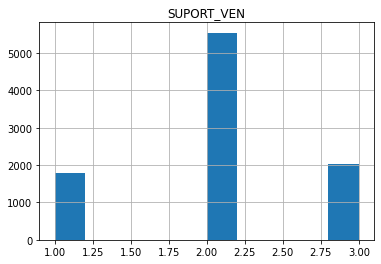

In [45]:
df[['SUPORT_VEN']].hist()

In [46]:
# Tentei fazer isso, mas acho que pode perder uma informação importante.
# Isso porque ao binarizar o campo, a correlação entre ele e o campo UTI diminuiu bastante
#df = df.replace(2, {'SUPORT_VEN': 1 })
#df = df.replace(3, {'SUPORT_VEN': 0 })

array([[<AxesSubplot:title={'center':'CLASSI_FIN'}>]], dtype=object)

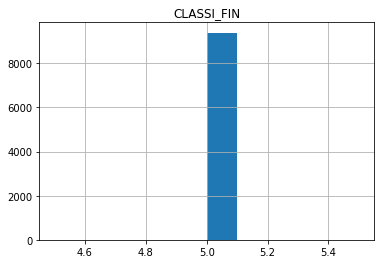

In [47]:
# Aqui buscou-se verificar a quantidade por classificação final do caso
#    1-SRAG por influenza
#    2-SRAG por outro vírus respiratório
#    3-SRAG por outro agente etiológico, qual:
#    4-SRAG não especificado
#    5-SRAG por COVID-19
df[['CLASSI_FIN']].hist()

In [48]:
corr = df[['FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'DIARREIA', 'VOMITO', 'OUTRO_SIN', 'PUERPERA', 'CARDIOPATI', 'HEMATOLOGI', 'SIND_DOWN', 'HEPATICA', 'ASMA', 'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL', 'OBESIDADE', 'OUT_MORBI', 'DOR_ABD', 'UTI', 'SUPORT_VEN']].corr()
corr

,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,PUERPERA,...,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OUT_MORBI,DOR_ABD,UTI,SUPORT_VEN
FEBRE,1.000000,0.240975,0.168493,0.033388,0.046467,0.046390,0.076478,0.019373,-0.001248,-0.021707,...,-0.070434,-0.023430,-0.027447,-0.003383,-0.041494,0.008509,-0.059555,0.010518,-0.025212,0.041515
TOSSE,0.240975,1.000000,0.178381,0.096071,0.061179,0.055862,0.052735,-0.004482,-0.000526,-0.010807,...,-0.002172,-0.057307,0.002190,-0.021085,-0.045560,0.040102,-0.046451,-0.004920,-0.051736,0.060548
GARGANTA,0.168493,0.178381,1.000000,0.041139,0.082257,0.033630,0.082518,0.055927,-0.014516,0.014535,...,-0.023985,-0.026833,-0.017712,-0.008612,-0.036129,0.009438,-0.051544,0.056830,-0.044641,0.074151
DISPNEIA,0.033388,0.096071,0.041139,1.000000,0.403622,0.357774,-0.010053,-0.043177,-0.113216,-0.018297,...,0.050442,0.017707,0.060417,0.005448,0.003962,0.074955,0.017969,-0.008205,0.123054,-0.213475
DESC_RESP,0.046467,0.061179,0.082257,0.403622,1.000000,0.419516,-0.010589,-0.017605,-0.149900,-0.005587,...,0.024660,0.038441,0.049979,0.022323,0.001176,0.058059,0.000028,0.034103,0.135999,-0.217450
SATURACAO,0.046390,0.055862,0.033630,0.357774,0.419516,1.000000,0.009709,-0.011429,-0.124686,-0.014509,...,0.069116,0.051966,0.061383,0.027608,0.025686,0.082322,0.039524,0.023153,0.221733,-0.325064
DIARREIA,0.076478,0.052735,0.082518,-0.010053,-0.010589,0.009709,1.000000,0.276439,0.053575,0.004676,...,-0.015735,-0.020681,-0.017533,-0.003736,0.012270,0.025696,-0.009543,0.133981,-0.017236,0.025574
VOMITO,0.019373,-0.004482,0.055927,-0.043177,-0.017605,-0.011429,0.276439,1.000000,0.057594,0.012263,...,0.020388,-0.010437,-0.014939,-0.025071,0.036123,0.010478,-0.017657,0.158638,-0.017787,0.043730
OUTRO_SIN,-0.001248,-0.000526,-0.014516,-0.113216,-0.149900,-0.124686,0.053575,0.057594,1.000000,0.006163,...,-0.018518,-0.018523,-0.035711,-0.026643,-0.016248,0.004565,0.037395,-0.020981,-0.028113,0.094421
PUERPERA,-0.021707,-0.010807,0.014535,-0.018297,-0.005587,-0.014509,0.004676,0.012263,0.006163,1.000000,...,-0.012708,0.006810,0.004253,0.000485,0.011042,-0.007005,-0.022840,0.000451,-0.003947,0.024751


In [49]:
# verificando variáveis mais correlacionadas conforme exemplo do professor Francisco Aparecido Rodrigues, francisco@icmc.usp.br.
# disponível em https://github.com/franciscoicmc/ciencia-de-dados/blob/master/Aula1-Preparacao-transformacao.ipynb

p = 0.75 # correlação mínima
var = []
for i in corr.columns:
    for j in corr.columns:
        if(i != j):
            if np.abs(corr[i][j]) > p: # se maior do que |p|
                var.append([i,j])
print('Variáveis mais correlacionadas:\n', var)

Variáveis mais correlacionadas:
 []


In [50]:
# distribuição de frequências
def calcularDistribuicaoDeFrequencias(colunas):
    distFreq = pd.DataFrame()
    for c in colunas:
        distFreq[c] = df[c].value_counts(normalize=True)
    return distFreq

display(calcularDistribuicaoDeFrequencias(friscos))
display(calcularDistribuicaoDeFrequencias(sintomas))
display(calcularDistribuicaoDeFrequencias(['CLASSI_FIN']))
display(calcularDistribuicaoDeFrequencias(['SUPORT_VEN']))

,FATOR_RISC,CARDIOPATI,PUERPERA,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OUT_MORBI
1,0.621057,0.344309,0.00309,0.00682,0.002877,0.008845,0.028346,0.234655,0.043905,0.052003,0.032928,0.033355,0.065644,0.245524
0,0.378943,0.655691,0.99691,0.99318,0.997123,0.991155,0.971654,0.765345,0.956095,0.947997,0.967072,0.966645,0.934356,0.754476


,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA
1.0,0.604433,0.708866,0.176364,0.76087,0.667945,0.609868,0.143009,0.078645,0.033035,0.146633,0.053495,0.055307
0.0,0.395567,0.291134,0.823636,0.23913,0.332055,0.390132,0.856991,0.921355,0.966965,0.853367,0.946505,0.944693


,CLASSI_FIN
5.0,1.0


,SUPORT_VEN
2.0,0.591113
3.0,0.217604
1.0,0.191283


In [51]:
df.head()

,SG_UF_NOT,ID_REGIONA,ID_MUNICIP,CO_MUN_NOT,CS_SEXO,NU_IDADE_N,TP_IDADE,CS_RACA,SG_UF,ID_RG_RESI,...,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,TOMO_RES,RES_AN,AN_SARS2,RES_IGG,RES_IGM,RES_IGA
100,SC,ITAJAI,BALNEARIO CAMBORIU,420200,F,87,3,1.0,SC,ITAJAI,...,0.0,0.0,0.0,0.0,6.0,NaN,0.0,NaN,NaN,NaN
215,SC,BRACO DO NORTE,BRACO DO NORTE,420280,F,37,3,1.0,SC,BRACO DO NORTE,...,0.0,0.0,0.0,0.0,6.0,NaN,0.0,NaN,NaN,NaN
451,SC,BRACO DO NORTE,SAO MARTINHO,421710,M,62,3,1.0,SC,BRACO DO NORTE,...,0.0,0.0,0.0,0.0,6.0,5.0,0.0,NaN,NaN,NaN
631,SC,JARAGUA DO SUL,JARAGUA DO SUL,420890,F,68,3,1.0,SC,JARAGUA DO SUL,...,0.0,0.0,0.0,0.0,6.0,4.0,0.0,NaN,NaN,NaN
1347,SC,JOINVILLE,JOINVILLE,420910,M,60,3,1.0,SC,JOINVILLE,...,0.0,0.0,0.0,0.0,6.0,1.0,0.0,NaN,NaN,NaN


In [52]:
#  RES_AN
#  1-positivo
#  2-Negativo
#  3-Inconclusivo
#  4-Não realizado
#  5-Aguardando resultado
#  9-Ignorado

# AN_SARS2
# 0-Não marcado
# 1-marcado pelo usuário

# PCR_RESUL
# 1-Detectável
# 2-Não Detectável
# 3-Inconclusivo
# 4-Não Realizado
# 5-Aguardando Resultado
# 9-Ignorado

# PCR_SARS2
# 0-Não marcado
# 1-marcado pelo usuário

# CLASSI_FIN
# 1-SRAG por influenza
# 2-SRAG por outro vírus respiratório
# 3-SRAG por outro agente etiológico, qual:
# 4-SRAG não especificado
# 5-SRAG por COVID-19

# Usei esse comando para descobrir como estavam preenchidos os resultados dos exames em relação à classificação final
df[['TOMO_RES', 'RAIOX_RES','RES_AN', 'AN_SARS2', 'PCR_RESUL', 'PCR_SARS2', 'RES_IGG', 'RES_IGM', 'RES_IGA', 'CLASSI_FIN']]

,TOMO_RES,RAIOX_RES,RES_AN,AN_SARS2,PCR_RESUL,PCR_SARS2,RES_IGG,RES_IGM,RES_IGA,CLASSI_FIN
100,6.0,6.0,NaN,0.0,1.0,1.0,NaN,NaN,NaN,5.0
215,6.0,6.0,NaN,0.0,1.0,1.0,NaN,NaN,NaN,5.0
451,6.0,6.0,5.0,0.0,1.0,1.0,NaN,NaN,NaN,5.0
631,6.0,3.0,4.0,0.0,1.0,1.0,NaN,NaN,NaN,5.0
1347,6.0,5.0,1.0,0.0,4.0,0.0,NaN,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...
754609,6.0,6.0,4.0,0.0,1.0,1.0,NaN,NaN,NaN,5.0
754726,6.0,5.0,4.0,0.0,1.0,1.0,NaN,NaN,NaN,5.0
754745,1.0,6.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,5.0
754792,1.0,6.0,5.0,0.0,1.0,0.0,4.0,4.0,4.0,5.0


In [54]:
# Removendo bebês para termos apenas pessoas com idade com valor inteiro em anos
df = df.loc[df['TP_IDADE'] == 3]

In [55]:
df = df.drop(['RES_AN', 'AN_SARS2', 'PCR_RESUL', 'PCR_SARS2', 'RES_IGG', 'RES_IGM', 'RES_IGA', 'CLASSI_FIN'], axis=1)

In [56]:
df = df.drop(['TP_IDADE'], axis=1)

In [59]:
df.head()

,SG_UF_NOT,ID_REGIONA,ID_MUNICIP,CO_MUN_NOT,CS_SEXO,NU_IDADE_N,CS_RACA,SG_UF,ID_RG_RESI,ID_MN_RESI,...,UTI,SUPORT_VEN,RAIOX_RES,EVOLUCAO,HISTO_VGM,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,TOMO_RES
100,SC,ITAJAI,BALNEARIO CAMBORIU,420200,F,87,1.0,SC,ITAJAI,ITAJAI,...,0.0,2.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0
215,SC,BRACO DO NORTE,BRACO DO NORTE,420280,F,37,1.0,SC,BRACO DO NORTE,BRACO DO NORTE,...,0.0,3.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0
451,SC,BRACO DO NORTE,SAO MARTINHO,421710,M,62,1.0,SC,BRACO DO NORTE,SAO MARTINHO,...,0.0,3.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0
631,SC,JARAGUA DO SUL,JARAGUA DO SUL,420890,F,68,1.0,SC,JARAGUA DO SUL,JARAGUA DO SUL,...,1.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0
1347,SC,JOINVILLE,JOINVILLE,420910,M,60,1.0,SC,JOINVILLE,JOINVILLE,...,1.0,1.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,6.0
